In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('./Data_Files/data_numerical.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head(3)

,Unnamed: 0,age_count,cancer_count,hrswrk_count,health_count,income_count,SSI_count,Health_Coverage_count,Education_count,JobOccupation_count,NoBalancedMeals_count,Ownership_home_count,highchol_count,worrymedbills_count,insulin_count,foodsecurity_count,race_count,Welfare_count,Delay_MedCost_count,Diabetic_count,Smoking_count,Depressed_count
0,0,2,0,1,3,1,0,1,3,15,3,2,0,1,0,1,2,0,2,0,0,0
1,1,2,0,2,3,1,0,1,3,0,3,2,0,2,0,1,2,0,2,0,0,0
2,2,2,0,3,1,3,0,1,4,5,3,2,0,1,0,1,2,0,1,0,0,2


In [ ]:
data.columns

Index(['Unnamed: 0', 'age_count', 'cancer_count', 'hrswrk_count',
       'health_count', 'income_count', 'SSI_count', 'Health_Coverage_count',
       'Education_count', 'JobOccupation_count', 'NoBalancedMeals_count',
       'Ownership_home_count', 'highchol_count', 'worrymedbills_count',
       'insulin_count', 'foodsecurity_count', 'race_count', 'Welfare_count',
       'Delay_MedCost_count', 'Diabetic_count', 'Smoking_count',
       'Depressed_count'],
      dtype='object')

In [ ]:
#I cut out urban/rural count - too many NA
data1 = data[['Unnamed: 0', 'age_count', 'cancer_count', 'hrswrk_count',
       'health_count', 'income_count', 'SSI_count', 'Health_Coverage_count',
       'Education_count', 'JobOccupation_count', 'NoBalancedMeals_count',
       'Ownership_home_count', 'highchol_count', 'worrymedbills_count',
       'insulin_count', 'foodsecurity_count', 'race_count', 'Welfare_count',
       'Delay_MedCost_count', 'Diabetic_count', 'Smoking_count',
       'Depressed_count']]

***Feature Selection***

In [ ]:
#Standardize data first
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data2 = ss.fit_transform(data1)

data2 = pd.DataFrame(data2, columns=data1.columns)

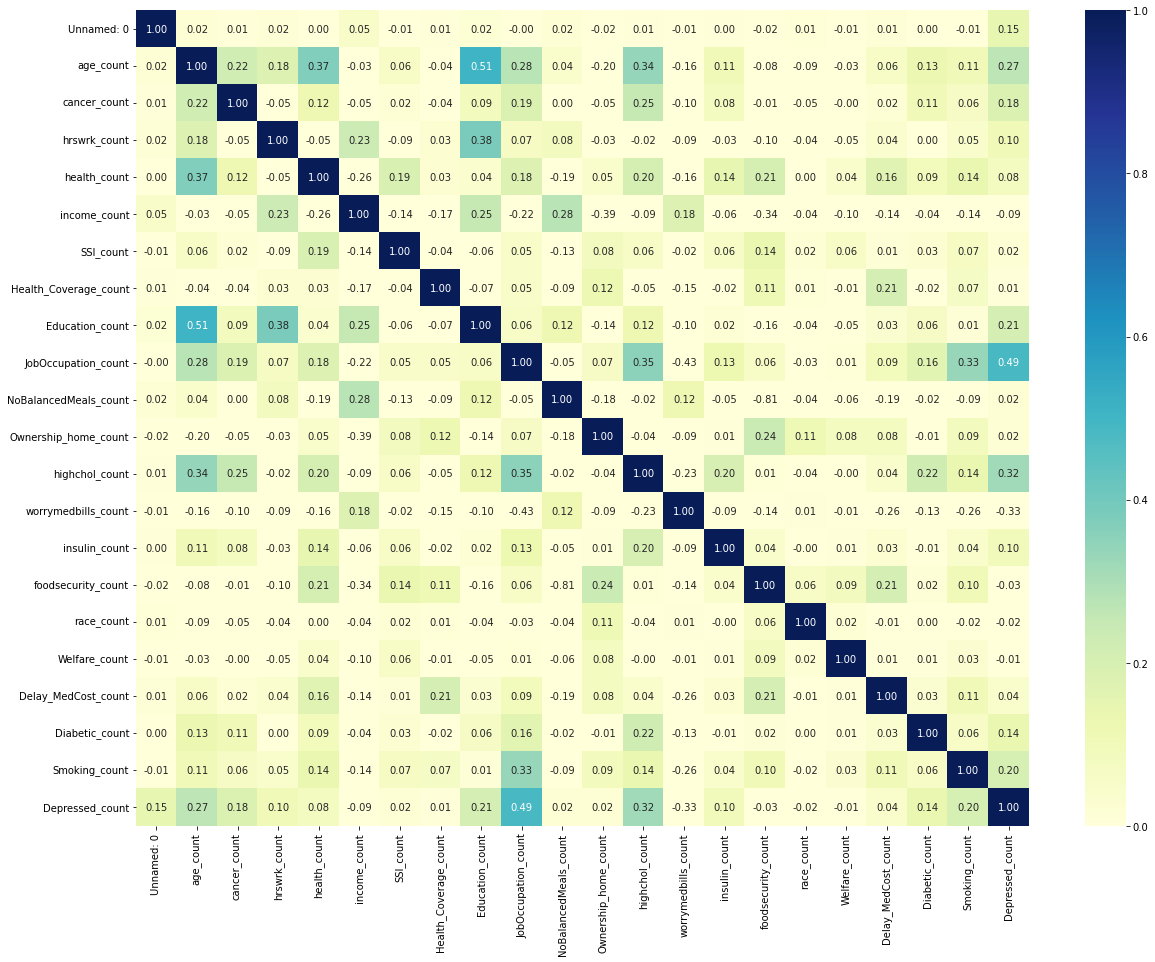

In [ ]:
#I will NOT be depending on .corr() for feature selection because I'm using categorical variables
#I used Tableau visualizations to see if there is a correlation between cancer_count and another variable
#See my Tableau_Visualization ipynb for more information
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(), vmin=0, annot=True, fmt='.2f', cmap='YlGnBu')

In [ ]:
#Choose certain variables that correlate the most to cancer_count (0.06)
#worrymedbills_count, health_count, JobOccupation_count, Drinking_count, cholmeds_count, insulin_count

In [ ]:
#I will not exclude any variables right now
#I might add additional variables later on

***get rid of missing values using simple imputer***

In [ ]:
import numpy as np

In [ ]:
#replace missing values by proportion

In [ ]:
data1.shape

(208765, 22)

In [ ]:
#During my previous datasets, I had many missing values. 
#I deleted some previous variables due to feature selection so now, none of my variables have misssing values
data1.isnull().sum()

Unnamed: 0               0
age_count                0
cancer_count             0
hrswrk_count             0
health_count             0
income_count             0
SSI_count                0
Health_Coverage_count    0
Education_count          0
JobOccupation_count      0
NoBalancedMeals_count    0
Ownership_home_count     0
highchol_count           0
worrymedbills_count      0
insulin_count            0
foodsecurity_count       0
race_count               0
Welfare_count            0
Delay_MedCost_count      0
Diabetic_count           0
Smoking_count            0
Depressed_count          0
dtype: int64

In [ ]:
data1.dtypes

Unnamed: 0               int64
age_count                int64
cancer_count             int64
hrswrk_count             int64
health_count             int64
income_count             int64
SSI_count                int64
Health_Coverage_count    int64
Education_count          int64
JobOccupation_count      int64
NoBalancedMeals_count    int64
Ownership_home_count     int64
highchol_count           int64
worrymedbills_count      int64
insulin_count            int64
foodsecurity_count       int64
race_count               int64
Welfare_count            int64
Delay_MedCost_count      int64
Diabetic_count           int64
Smoking_count            int64
Depressed_count          int64
dtype: object

***Fill in missing values***

In [ ]:
#Iterative Imputer
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer, KNNImputer
#from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
#During my previous data cleaning, I successfully used KNNImputer to remove missing values
#KNNImputer replaces missing values using the K-nearest method. 
#I commented this out as I don't have missing values but here is the method for anyone who needs to use it

#imp = KNNImputer(missing_values=np.nan, n_neighbors=5)
#data2 = imp.fit_transform(data1)

In [ ]:
data2 = pd.DataFrame(data2, columns=[['Unnamed: 0', 'age_count', 'cancer_count', 'hrswrk_count',
       'health_count', 'income_count', 'SSI_count', 'Health_Coverage_count',
       'Education_count', 'JobOccupation_count', 'NoBalancedMeals_count',
       'Ownership_home_count', 'highchol_count', 'worrymedbills_count',
       'insulin_count', 'foodsecurity_count', 'race_count', 'Welfare_count',
       'Delay_MedCost_count', 'Diabetic_count', 'Smoking_count',
       'Depressed_count']])

In [ ]:
from google.colab import files
data2.to_csv('cleaned_data') 
files.download('cleaned_data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Imported data_numerical - this was the data I cleaned in the Tableau ipynb
from google.colab import files
uploaded = files.upload()

Saving data_numerical.csv to data_numerical (1).csv


In [ ]:
#data = pd.read_csv('./cleaned_data.csv')
from google.colab import files
data = pd.read_csv('./data_numerical (1).csv')

# New Section

In [ ]:
#This section is a repeat of my Tableau.ipynb
#I plan to clean the 20 selected variables that I believe would be related to cancer rates
#I chose these 20 variables based on research and common sense.
#Some variables I wanted to use such as drinking frequency, BMI, and location were unusable due to high rate of missing values.
#Most of my data are numerical categorical. They will all be needed to cleaned and converted to categorical dummy variables.

#Other variables such as exercising amount contain too many missing values that I was unable to get it to work. 

In [ ]:
data.head()

,Unnamed: 0,age_count,cancer_count,hrswrk_count,health_count,income_count,SSI_count,Health_Coverage_count,Education_count,JobOccupation_count,NoBalancedMeals_count,Ownership_home_count,highchol_count,worrymedbills_count,insulin_count,foodsecurity_count,race_count,Welfare_count,Delay_MedCost_count,Diabetic_count,Smoking_count,Depressed_count
0,0,2,0,1,3,1,0,1,3,15,3,2,0,1,0,1,2,0,2,0,0,0
1,1,2,0,2,3,1,0,1,3,0,3,2,0,2,0,1,2,0,2,0,0,0
2,2,2,0,3,1,3,0,1,4,5,3,2,0,1,0,1,2,0,1,0,0,2
3,3,5,0,1,3,1,0,1,2,12,3,1,1,2,0,1,1,0,1,0,0,2
4,6,3,0,2,1,2,0,1,3,2,3,2,0,2,0,1,1,0,1,0,1,0


In [ ]:
## ***AGE - NUMERICAL***
#https://www.cancer.gov/about-cancer/causes-prevention/risk/age#:~:text=The%20incidence%20rates%20for%20cancer,groups%2060%20years%20and%20older.
#According to cancer.gov, advanced age one of the MOST important risk factor overall to cancer risk
#Cancer rates climb significantly the older you get.
#Median age for cancer is in the low to upper 60s

In [ ]:
data['age'] = data.loc[:, 'age_count']

In [ ]:
data['age'].replace(to_replace=1,
           value="Young", inplace=True)

In [ ]:
data['age'].replace(to_replace=2,
           value="Lower_Middle_Aged", inplace=True)

In [ ]:
data['age'].replace(to_replace=3,
           value="Middle_Aged", inplace=True)

In [ ]:
data['age'].replace(to_replace=4,
           value="Upper_Middle_Aged", inplace=True)

In [ ]:
data['age'].replace(to_replace=5,
           value="Elderly", inplace=True)

In [ ]:
data['age'].value_counts()

Young                53199
Elderly              44431
Upper_Middle_Aged    41931
Middle_Aged          39551
Lower_Middle_Aged    29653
Name: age, dtype: int64

***HOURSWRK (Categorical)***

In [1]:
#hrs worked - 0 to 95, don't include 97-99
#0-95 - # work hours per week a year
#97 - Unknown--refused
#98 - Unknown--not ascertained
#99 - Unknown--don't know

In [ ]:
#I split the number of hours worked per week to four categories. 
#This included people who work part time below 40 hours and those who work overtime up to over 60 hours

#https://www.nature.com/articles/bjc20169#:~:text=We%20observed%20no%20association%20between,CI%3A%200.76%2C%200.98).
#According to them, they observed no significant relation towards work hours and cancer rates
#People who work less have slightly less cancer rate, so I will include this variable to see its impact and remove it if it's insignificant

In [ ]:
data['hrswrk'] = data.loc[:, 'hrswrk_count']

In [ ]:
data['hrswrk'].replace(to_replace=1,
           value="HoursWrk_0-30", inplace=True)

In [ ]:
data['hrswrk'].replace(to_replace=2,
           value="HoursWrk_30-40", inplace=True)

In [ ]:
data['hrswrk'].replace(to_replace=3,
           value="HoursWrk_40-60", inplace=True)

In [ ]:
data['hrswrk'].replace(to_replace=4,
           value="HoursWrk_60+", inplace=True)

In [ ]:
data['hrswrk'].value_counts()

HoursWrk_0-30     128851
HoursWrk_30-40     50620
HoursWrk_40-60     25486
HoursWrk_60+        3808
Name: hrswrk, dtype: int64

***Health - Categorical***

In [2]:
#This is of course debatable. This asks people how healthy they feel. It's plausable that those who are in poor health believe they are healthy.
#Everyone has different standards towards health. Many can feel healthy but suffer from unknown conditions as well
#Overall, I expect for people in poor health to have higher rates of cancer

In [ ]:
#1 - Excellent
#2 - Very Good
#3 - Good
#4 - Fair
#5 - Poor
#7 - Unknown-refused
#8 - Unknown-not ascertained
#9 - Unknown-don't know

In [ ]:
data['health'] = data.loc[:, 'health_count']

In [ ]:
#Health into dummy variables
data['health'].replace(to_replace=1,
           value="Excellent_Health", inplace=True)

In [ ]:
data['health'].replace(to_replace=2,
           value="Very_Good_Health", inplace=True)

In [ ]:
data['health'].replace(to_replace=3,
           value="Good_Health", inplace=True)

In [ ]:
data['health'].replace(to_replace=4,
           value="Fair", inplace=True)

In [ ]:
data['health'].replace(to_replace=5,
           value="Poor_Health", inplace=True)

In [ ]:
data = data[data.health != 8]

In [ ]:
data['health'].value_counts()

Excellent_Health    73331
Very_Good_Health    66156
Good_Health         48469
Fair                16120
Poor_Health          4688
Name: health, dtype: int64

***INCFAM07ON (Categorical)***

In [ ]:
#11 - 0 to 35k, 12 - 35k-50k, 22 = 50k to 75k, 23 - 75k to 100k, 24 - 100k and up
#This represents a person's income. 

#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6318397/#:~:text=By%20contrast%2C%20those%20of%20lung,of%20certain%20forms%20of%20cancer.
#Lower income is linked to unhealthy food, poorer healthcare, less cancer screening, and more cancer rates
#Lower income can indicate higher alcohol and smoking usage
#Income is a significant indicator of cancer
data['INCFAM07ON'].value_counts()

In [ ]:
data['income'] = data.loc[:, 'income_count']

In [ ]:
data['income'].replace(to_replace=1,
           value="Low-Income", inplace=True)

In [ ]:
data['income'].replace(to_replace=2,
           value="Lower-Middle-Income", inplace=True)

In [ ]:
data['income'].replace(to_replace=3,
           value="Middle-Income", inplace=True)

In [ ]:
data['income'].replace(to_replace=4,
           value="High-Income", inplace=True)

In [ ]:
data['income'].replace(to_replace=5,
           value="Very-High-Income", inplace=True)

In [ ]:
data['income'].value_counts()

Very-High-Income       66053
Low-Income             55790
Middle-Income          35950
High-Income            27796
Lower-Middle-Income    23175
Name: income, dtype: int64

***GOTSSIWHY (Numerical)***

In [3]:
#0                   NIU
#1                   No
#2                   Yes
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
#Whether a person is on SSI. Use of SSI usually correlates to higher age

In [ ]:
data['SSI'] = data.loc[:, 'SSI_count']

In [ ]:
data['SSI'].replace(to_replace=0,
           value="No_SSI", inplace=True)

In [ ]:
data['SSI'].replace(to_replace=1,
           value="Yes_SSI", inplace=True)

In [ ]:
data['SSI'].value_counts()

No_SSI     204748
Yes_SSI      4016
Name: SSI, dtype: int64

***HINOTCOVE - Numerical***

In [4]:
#0 - NIU
#1 - No, has coverage
#2 - Yes, has no coverage
#7 - Unknown-refused
#8 - Unknown-not ascertained
#9 - Unknown-don't know

In [ ]:
#Whether a person has heathcare coverage. In 2018, over 90% of americans have health coverage
#https://www.commonwealthfund.org/publications/issue-briefs/2019/aug/who-are-remaining-uninsured-and-why-do-they-lack-coverage
#Uninsured are generally lower-income but younger (below 35 years old), this could mean it doesn't correlate to cancer rates
#I thought it would be worthwhile to see if cancer rates would be actually lower due to the age factor

In [ ]:
data['Health_Coverage'] = data.loc[:, 'Health_Coverage_count']

In [ ]:
data['Health_Coverage_count'].value_counts()

1    191051
2     17713
Name: Health_Coverage_count, dtype: int64

In [ ]:
data['Health_Coverage'].replace(to_replace=1,
           value="Has_healthcoverage", inplace=True)

In [ ]:
data['Health_Coverage'].replace(to_replace=2,
           value="No_healthcoverage", inplace=True)

In [ ]:
data['Health_Coverage'].value_counts()

Has_healthcoverage    191051
No_healthcoverage      17713
Name: Health_Coverage, dtype: int64

***EDUC - (Categorical)***

In [ ]:
#000 - NIU
#100 - Grade 12 or less, no high school diploma or equivalent
#101 - Grade 8 or less (no further detail)
#102 - Never attended/kindergarten only
#103 - Grades 1-11 (no further detail)
#104 - Grade 1
#105 - Grade 2
#106 - Grade 3
#107 - Grade 4
#108 - Grade 5
#109 - Grade 6
#110 - Grade 7
#111 - Grade 8
#112 - Grade 9-12, no diploma (no further detail)
#113 - Grade 9
#114 - Grade 10
#115 - Grade 11
#116 - 12th grade, no diploma
#200 - High school diploma or GED
#201 - High school graduate
#202 - GED or equivalent
#300 - Some college, no 4yr degree
#301 - Some college, no degree
#302 - AA degree: technical/vocational/occupational
#303 - AA degree: academic program
#400 - Bachelor's degree (BA,AB,BS,BBA)
#500 - Master's, Professional, or Doctoral Degree
#501 - Master's degree (MA,MS,Med,MBA)
#502 - Professional (MD,DDS,DVM,JD)
#503 - Doctoral degree (PhD, EdD)
#504 - Other degree
#996 - No degree, years of education unknown
#997 - Unknown--refused
#998 - Unknown--not ascertain ed
#999 - Unknown--don't know

In [5]:
#000 - NIU_educ (0)
#100-116 - Grade 12 or less, no high school diploma or equivalent (1)
#200-202 - High school diploma or GED (2)
#300-303 - Some college, no 4yr degree (3)
#400 - Bachelor's degree (BA,AB,BS,BBA) (4)
#500-504 - Master's, Professional, or Doctoral Degree (5)

In [ ]:
#Education - There is a significant increase which those who don't go to college

#https://societyhealth.vcu.edu/work/the-projects/why-education-matters-to-health-exploring-the-causes.html
#College educated Americams are more likely to have health insurance, have higher income, 
#and more easily buy healthy foods and good transportation/housing

In [ ]:
data['Education'] = data.loc[:, 'Education_count']

In [ ]:
data['Education'].replace(to_replace=0,
           value="NIU_educ", inplace=True)

In [ ]:
data['Education'].replace(to_replace=1,
           value="High_School_Or_Less", inplace=True)

In [ ]:
data['Education'].replace(to_replace=2,
           value="High_School_Graduate", inplace=True)

In [ ]:
data['Education'].replace(to_replace=3,
           value="Some_College", inplace=True)

In [ ]:
data['Education'].replace(to_replace=4,
           value="Bachelors_Degree", inplace=True)

In [ ]:
data['Education'].replace(to_replace=5,
           value="Masters_Degree", inplace=True)

In [ ]:
data['Education'].value_counts()

High_School_Or_Less     55431
Some_College            48552
High_School_Graduate    40165
Bachelors_Degree        32196
Masters_Degree          19229
NIU_educ                13191
Name: Education, dtype: int64

***OCC1995 - Categorical***

In [6]:
# OCC1995 - Occupation

#MANAGERIAL AND PROFESSIONAL SPECIALTY OCCUPATIONS
#0100                Executive, Administrative, and Managerial Occupations               
#0102                Officials and administrators, public administration
#0103                Managers and administrators, except public administration
#0104                Management related occupations
#0200                Professional Specialty Occupations
#0210                Engineers, Architechts, Surveyors, and Scientists:
#0211                Engineers, scientists, and technicians
#0212                Engineers and architects
#0213                Engineers
#0214                Architects and surveyors
#0215                Scientists
#0216                Natural mathematical and computer scientists
#0220                Health Assessment, Diagnosing, and Treating Occupations:
#0221                Health workers
#0222                Health diagnosing occupations
#0223                Health assessment and treating occupations
#0230                Teachers, Librarians, Archivists, and Curators:
#0231                Teachers, librarians and counselors
#0232                Teachers, including professors and instructors
#0240                All other professional specialty occupations
#0241                All other professional, technical, and kindred workers
#0242                Writers, artists, entertainers and athletes
#0243                Other professional specialty occupations

#TECHNICAL, SALES, AND ADMINISTRATIVE SUPPORT OCCUPATIONS
#0300                Technicians and Related Support Occupations
#0301                Health technologists and technicians
#0302                Engineering and science technicians
#0303                Technologists, technicians except health
#0400                Sales Occupations:
#0401                Sales workers
#0402                Supervisors and proprietors
#0403                Sales representatives, commodities and finance
#0404                Other sales
#0500                Administrative Support Occupations, Including Clerical
#0501                Mail carriers, baggagemen, teleg. messengers
#0502                Stenos, typists, secretaries, receptionist
#0503                Other clerical
#0504                Financial records processing occupations
#0505                Bookkeepers
#0506                Office machine operators
#0507                Computer equipment operators
#0508                All other clerical workers
#0509                Other administrative support

#SERVICE OCCUPATIONS
#0600                Private Household Occupations:
#0601                Private household workers
#0602                Housekeepers, laundresses, baby sitters, etc.
#0700                Protective Service Occupations
#0701                Protective service
#0702                Police and firefighters
#0703                Other protective service occupations
#0800                Service Occupations, Except Protective and Household
#0801                All other service workers
#0802                Food service
#0803                Cleaning and building service
#0804                Health and personal service
#0805                Health service
#0806                Personal service

#FARMING, FORESTRY, AND FISHING OCCUPATIONS
#0900                Farm Operators and Managers:
#0901                Farmers and farm managers
#0902                Farmers
#0903                Farm managers
#1000                Other Agricultural and Related Occupations:
#1001                Farm workers and other agricultural workers
#1002                Farm laborers and farm foremen
#1003                Farm laborers
#1004                Forestry and fishing occupations

#PRECISION PRODUCTION, CRAFT, AND REPAIR OCCUPATIONS
#1100                Mechanics and Repairers Occupation
#1101                Mechanics and repairers
#1102                Construction, including carpenters
#1103                Machinists, mechanics, repairment, and metal craftsmen
#1200                Construction and Extractive Trades Occupation
#1201                Construction and extractive trades
#1202                Apprentice, construction
#1203                Carpenters
#1204                Other construction craftsmen
#1205                Mine operatives and laborers
#1300                Precision Production Occupations:
#1301                Precision production occupations
#1302                Metal craftsmen, except mechanics
#1303                All other craftsmen
#1304                Apprentice, machinists, mechanics, metals

#OPERATORS, FABRICATORS, AND LABORERS
#1400                Machine Operators, Assemblers, and Inspectors
#1401                Operatives, except transport
#1402                Machine operators and tenderers, except precision
#1403                Fabricators, assemblers, inspectors, and samplers
#1500                Transportation and Material Moving Occupations
#1501                Transport equipment operatives
#1502                Motor vehicle operators
#1503                Other transportation, except motor vehicles
#1504                Material moving equipment operators
#1505                Construction laborers
#1506                Freight, stock and material handlers
#1507                All other operatives
#1508                Laborers, except farm
#1509                All other laborers except farm and mine

#MILITARY OCCUPATIONS
#1600                Military

#EXPERIENCED UNEMPLOYED NOT CLASSIFIED BY OCCUPATION
#7777                Unknown-refused
#8888                Unknown-not ascertained
#9999                Unknown-don't know

In [ ]:
#Job occupation 
#Office jobs has affects such as increased blood pressure, cholestral, and body fat from lack of exercise or movement
#Agriculture jobs expose to UV rays and sunlight and agricultural chemicals
#Manufacturing - certain certains like rubber/plastics, have toxins 
#Construction - exposure to abestos, radon, and toxic materials
#Miltiary - often exposure to toxic chemicals, burn pits, etc

In [ ]:
data['JobOccupation'] = data.loc[:, 'JobOccupation_count']

In [ ]:
data['JobOccupation'].replace(to_replace=0,
           value="Not_In_LaborForce", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=1,
           value="Executive, Administrative, and Managerial Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=2,
           value="Professional Specialty Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=3,
           value="Technicians and Related Support Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=4,
           value="Sales Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=5,
           value="Administrative Support Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=6,
           value="Private Household Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=7,
           value="Protective Service Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=8,
           value="Service Occupations, Except Protective and Household", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=9,
           value="Farm Operators and Managers", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=10,
           value="Other Agricultural and Related Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=11,
           value="Mechanics and Repairers Occupation", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=12,
           value="Construction and Extractive Trades Occupation", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=13,
           value="Precision Production Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=14,
           value="Machine Operators, Assemblers, and Inspectors", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=15,
           value="Transportation and Material Moving Occupations", inplace=True)

In [ ]:
data['JobOccupation'].replace(to_replace=16,
           value="Military", inplace=True)

In [ ]:
data['JobOccupation'].value_counts()

Not_In_LaborForce                                        138057
Professional Specialty Occupations                        15004
Executive, Administrative, and Managerial Occupations     10522
Service Occupations, Except Protective and Household       9810
Administrative Support Occupations                         9572
Sales Occupations                                          6586
Machine Operators, Assemblers, and Inspectors              4047
Transportation and Material Moving Occupations             3850
Construction and Extractive Trades Occupation              3312
Technicians and Related Support Occupations                2134
Mechanics and Repairers Occupation                         2111
Protective Service Occupations                             1343
Other Agricultural and Related Occupations                 1194
Precision Production Occupations                            908
Military                                                    314
Name: JobOccupation, dtype: int64

***FSBALANC - Numerical***

In [7]:
#1                   Often True
#2                   Sometimes true
#3                   Never true
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
#Balanced meals - Balanced meals, more consumption of fruits, vegetables lowers risk
#Processed foods or red meat increased risks of cancer

In [ ]:
data['NoBalancedMeals'] = data.loc[:, 'NoBalancedMeals_count']

In [ ]:
data['NoBalancedMeals'].replace(to_replace=1,
           value='Often True', inplace=True)

In [ ]:
data['NoBalancedMeals'].replace(to_replace=2,
           value='Sometimes True', inplace=True)

In [ ]:
data['NoBalancedMeals'].replace(to_replace=3,
           value='Never True', inplace=True)

In [ ]:
data['NoBalancedMeals']. value_counts()

Never True        187124
Sometimes True     15267
Often True          6373
Name: NoBalancedMeals, dtype: int64

***Ownership (Categorical)***

In [8]:
#00                  NIU
#10                  Owned or being bought
#11                  Owned
#12                  Being bought
#20                  Rented
#30                  Other arrangement
#40                  Rent free
#97                  Unknown--refused
#98                  Unknown--not ascertained
#99                  Unknown--don't know

In [ ]:
#Homeownership - cause is dubious 

In [ ]:
data['Ownership_home'] = data.loc[:, 'Ownership_home_count']

In [ ]:
data['Ownership_home'].replace(to_replace=1,
           value="yes_ownership", inplace=True)

In [ ]:
data['Ownership_home'].replace(to_replace=2,
           value="no_ownership", inplace=True)

In [ ]:
data['Ownership_home'].value_counts()

yes_ownership    143861
no_ownership      64903
Name: Ownership_home, dtype: int64

In [9]:
#***CHOlHIGHEV (Categorical)***

In [ ]:
#0                   NIU
#1                   No
#2                   Yes
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
#Cholestral has huge impact on cancer rates

In [ ]:
data['highchol'] = data.loc[:, 'highchol_count']

In [ ]:
data['highchol'].replace(to_replace=[0, 0.2],
           value="No_highchol", inplace=True)

In [ ]:
data['highchol'].replace(to_replace=1,
           value="highchol", inplace=True)

In [ ]:
data['highchol'].value_counts()

No_highchol    185789
highchol        22975
Name: highchol, dtype: int64

In [10]:
#***WORMEDBILL***

In [ ]:
#0                   NIU
#1                   Very worried
#2                   Somewhat worried
#3                   Not at all worried
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
#Stress levels - potentially change hormone levels causing increased cancer risk

In [ ]:
data['worrymedbills'] = data.loc[:, 'worrymedbills_count']

In [ ]:
data['worrymedbills'].replace(to_replace=0,
           value="not_worried_medbills", inplace=True)

In [ ]:
data['worrymedbills'].replace(to_replace=1,
           value="somewhat_worried_medbills", inplace=True)

In [ ]:
data['worrymedbills'].replace(to_replace=2,
           value="not_worried_medbills", inplace=True)

In [ ]:
data['worrymedbills'].value_counts()

not_worried_medbills         187155
somewhat_worried_medbills     21609
Name: worrymedbills, dtype: int64

In [ ]:
#***Insulin***

In [11]:
#0                   NIU
#1                   No
#2                   Yes
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
#Insulin - could be correlated to diabetes which causes increased cancer risks

In [ ]:
data['insulin'] = data.loc[:, 'insulin_count']

In [ ]:
data['insulin'].replace(to_replace=0,
           value="No_Insulin", inplace=True)

In [ ]:
data['insulin'].replace(to_replace=1,
           value="Yes_Insulin", inplace=True)

In [ ]:
data['insulin'].value_counts()

No_Insulin     206269
Yes_Insulin      2495
Name: insulin, dtype: int64

In [ ]:
#***FSSTATDET (Category)

In [12]:
#1                   High food security (raw score 0)
#2                   Marginal food security (raw score 1-2)
#3                   Low food security (raw score 3-5)
#4                   Very low food security (raw score 6-10)
#9                   Unknown

In [ ]:
#Food security - does not affect cancer rates

In [ ]:
data['foodsecurity'] = data.loc[:, 'foodsecurity_count']

In [ ]:
data['foodsecurity'].replace(to_replace=1,
           value="High_food_security", inplace=True)

In [ ]:
data['foodsecurity'].replace(to_replace=2,
           value="Marginal_food_security", inplace=True)

In [ ]:
data['foodsecurity'].replace(to_replace=3,
           value="Low_food_security", inplace=True)

In [ ]:
data['foodsecurity'].replace(to_replace=4,
           value="Very_low_food_security", inplace=True)

In [ ]:
data['foodsecurity'].value_counts()

High_food_security        173887
Marginal_food_security     15344
Low_food_security          10962
Very_low_food_security      8571
Name: foodsecurity, dtype: int64

In [ ]:
#***RACENEW (Categorical)***

In [ ]:
#100                 White only
#200                 Black/African American only
#300                 American Indian/Alaska Native only
#400                 Asian only
#500                 Other Race and Multiple Race
#510                 Other Race and Multiple Race (2019-forward: Excluding American Indian/Alaska

In [ ]:
data['race'] = data.loc[:, 'race_count']

In [ ]:
data['race'].replace(to_replace=1,
           value="White", inplace=True)

In [ ]:
data['race'].replace(to_replace=2,
           value="Black", inplace=True)

In [ ]:
data['race'].replace(to_replace=3,
           value="Native-American", inplace=True)

In [ ]:
data['race'].replace(to_replace=4,
           value="Asian", inplace=True)

In [ ]:
data['race'].replace(to_replace=5,
           value="Other_Races", inplace=True)

In [ ]:
data['race'].value_counts()

White              164685
Black               22604
Asian               11933
Other_Races          6756
Native-American      2786
Name: race, dtype: int64

In [ ]:
#WELFMO (Categorical)

In [13]:
#00                  NIU
#01                  1 month
#02                  2 months
#03                  3 months
#04                  4 months
#05                  5 months
#06                  6 months
#07                  7 months
#08                  8 months
#09                  9 months
#10                  10 months
#11                  11 months
#12                  12 months
#97                  Unknown-refused
#98                  Unknown-not ascertained
#99                  Unknown-don't know

In [ ]:
#Welfare - linked to lower food quality, more processed foods due to budget constraints

In [ ]:
data['Welfare'] = data.loc[:, 'Welfare_count']

In [ ]:
data['Welfare'].replace(to_replace=0,
           value='Not_Welfare', inplace=True)

In [ ]:
data['Welfare'].replace(to_replace=1,
           value='On_Welfare', inplace=True)

In [ ]:
data['Welfare'].value_counts()

Not_Welfare    206907
On_Welfare       1857
Name: Welfare, dtype: int64

In [ ]:
#***DELAYCOST*** (Numerical)

In [14]:
#0                   NIU
#1                   No
#2                   Yes
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know (1993-96: DK or refused)

In [ ]:
#Delayed medical cost. Could be correlated to income

In [ ]:
data['Delay_MedCost'] = data.loc[:, 'Delay_MedCost_count']

In [ ]:
data['Delay_MedCost'].replace(to_replace=1,
           value='No_DelayMed_Cost', inplace=True)

In [ ]:
data['Delay_MedCost'].replace(to_replace=2,
           value='DelayMed_Cost', inplace=True)

In [ ]:
data['Delay_MedCost'].value_counts()

No_DelayMed_Cost    194361
DelayMed_Cost        14403
Name: Delay_MedCost, dtype: int64

In [15]:
#***DIAPRECOND (Diabetic)***

In [ ]:
#Highly correlated to cancer rates. 

In [ ]:
data['Diabetic'] = data.loc[:, 'Diabetic_count']

In [ ]:
data['Diabetic'].replace(to_replace=1,
           value='Diabetic', inplace=True)

In [ ]:
data['Diabetic'].replace(to_replace=0,
           value='Not_Diabetic', inplace=True)

In [ ]:
data['Diabetic'].value_counts()

Not_Diabetic    203215
Diabetic          5549
Name: Diabetic, dtype: int64

In [16]:
#SMOKFREQNOW (Categorical)

In [ ]:
#0                   NIU
#1                   Not at all
#2                   Some days
#3                   Every day
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
data['Smoking'] = data.loc[:, 'Smoking_count']

In [ ]:
data['Smoking'].replace(to_replace=0,
           value='No_Smoking', inplace=True)

In [ ]:
data['Smoking'].replace(to_replace=1,
           value='Smoking', inplace=True)

In [ ]:
data['Smoking'].value_counts()

No_Smoking    197120
Smoking        11644
Name: Smoking, dtype: int64

In [ ]:
#UNHAPPY (Categorical)

In [ ]:
#0                   Not true
#1                   Somewhat true
#2                   Certainly true
#6                   NIU
#7                   Unknown-refused
#8                   Unknown-not ascertained
#9                   Unknown-don't know

In [ ]:
data['Depressed'] = data.loc[:, 'Depressed_count']

In [ ]:
data['Depressed'].replace(to_replace=0,
           value='NIU_Depressed', inplace=True)

In [ ]:
data['Depressed'].replace(to_replace=1,
           value='Depressed', inplace=True)

In [ ]:
data['Depressed'].replace(to_replace=2,
           value='Not_Depressed', inplace=True)

In [ ]:
data['Depressed'].value_counts()

NIU_Depressed    161299
Not_Depressed     27679
Depressed         19786
Name: Depressed, dtype: int64

***Dummy Variables***

In [ ]:
#Index(['Unnamed: 0', 'age_count', 'cancer_count', 'hrswrk_count',
#       'health_count', 'income_count', 'SSI_count', 'Health_Coverage_count',
#       'Education_count', 'JobOccupation_count', 'NoBalancedMeals_count',
#       'Ownership_home_count', 'highchol_count', 'worrymedbills_count',
#       'insulin_count', 'foodsecurity_count', 'race_count', 'Welfare_count',
#       'Delay_MedCost_count', 'Diabetic_count', 'Smoking_count',
#       'Depressed_count'],
#      dtype='object')

In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['age']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#dropped elderly
age = pd.DataFrame(
    ohe.transform(data[['age']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

age.head()

,age_Lower_Middle_Aged,age_Middle_Aged,age_Upper_Middle_Aged,age_Young
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['hrswrk']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#dropped hrswrk_HoursWrk_0-30
hrswrk = pd.DataFrame(
    ohe.transform(data[['hrswrk']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

hrswrk.head()

,hrswrk_HoursWrk_30-40,hrswrk_HoursWrk_40-60,hrswrk_HoursWrk_60+
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['health']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#excellent health
health = pd.DataFrame(
    ohe.transform(data[['health']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

health.head()

,health_Fair,health_Good_Health,health_Poor_Health,health_Very_Good_Health
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
#Use one_hot_encoder to get dummy variables. Drop first column 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['income']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#drop high income
income = pd.DataFrame(
    ohe.transform(data[['income']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

income.head()

,income_Low-Income,income_Lower-Middle-Income,income_Middle-Income,income_Very-High-Income
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['SSI']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#drop no ssi
SSI = pd.DataFrame(
    ohe.transform(data[['SSI']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

SSI.head()

,SSI_Yes_SSI
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
#drop has healthcoverage
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Health_Coverage']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
Health_Coverage = pd.DataFrame(
    ohe.transform(data[['Health_Coverage']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Health_Coverage.head()

,Health_Coverage_No_healthcoverage
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Education']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#drop bachelors degree
Education = pd.DataFrame(
    ohe.transform(data[['Education']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Education.head()

,Education_High_School_Graduate,Education_High_School_Or_Less,Education_Masters_Degree,Education_NIU_educ,Education_Some_College
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['JobOccupation']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#drop admin support occupations
JobOccupation = pd.DataFrame(
    ohe.transform(data[['JobOccupation']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

JobOccupation.head()

,JobOccupation_Construction and Extractive Trades Occupation,"JobOccupation_Executive, Administrative, and Managerial Occupations","JobOccupation_Machine Operators, Assemblers, and Inspectors",JobOccupation_Mechanics and Repairers Occupation,JobOccupation_Military,JobOccupation_Not_In_LaborForce,JobOccupation_Other Agricultural and Related Occupations,JobOccupation_Precision Production Occupations,JobOccupation_Professional Specialty Occupations,JobOccupation_Protective Service Occupations,JobOccupation_Sales Occupations,"JobOccupation_Service Occupations, Except Protective and Household",JobOccupation_Technicians and Related Support Occupations,JobOccupation_Transportation and Material Moving Occupations
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['NoBalancedMeals']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#never true
NoBalancedMeals = pd.DataFrame(
    ohe.transform(data[['NoBalancedMeals']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

NoBalancedMeals.head()

,NoBalancedMeals_Often True,NoBalancedMeals_Sometimes True
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Ownership_home']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#no home ownership
Ownership_home = pd.DataFrame(
    ohe.transform(data[['Ownership_home']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Ownership_home.head()

,Ownership_home_yes_ownership
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['highchol']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#no high chol
highchol = pd.DataFrame(
    ohe.transform(data[['highchol']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

highchol.head()

,highchol_highchol
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['worrymedbills']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#not worried medbills
worrymedbills = pd.DataFrame(
    ohe.transform(data[['worrymedbills']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

worrymedbills.head()

,worrymedbills_somewhat_worried_medbills
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['insulin']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#no insulin
insulin = pd.DataFrame(
    ohe.transform(data[['insulin']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

insulin.head()

,insulin_Yes_Insulin
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['foodsecurity']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#high food security
foodsecurity = pd.DataFrame(
    ohe.transform(data[['foodsecurity']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

foodsecurity.head()

,foodsecurity_Low_food_security,foodsecurity_Marginal_food_security,foodsecurity_Very_low_food_security
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['race']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#asian
race = pd.DataFrame(
    ohe.transform(data[['race']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

race.head()

,race_Black,race_Native-American,race_Other_Races,race_White
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Welfare']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
#not welfare
Welfare = pd.DataFrame(
    ohe.transform(data[['Welfare']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Welfare.head()

,Welfare_On_Welfare
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Delay_MedCost']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
Delay_MedCost = pd.DataFrame(
    ohe.transform(data[['Delay_MedCost']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Delay_MedCost.head()

,Delay_MedCost_No_DelayMed_Cost
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Diabetic']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
Diabetic = pd.DataFrame(
    ohe.transform(data[['Diabetic']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Diabetic.head()

,Diabetic_Not_Diabetic
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Smoking']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
Smoking = pd.DataFrame(
    ohe.transform(data[['Smoking']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Smoking.head()

,Smoking_Smoking
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [ ]:
#Use one_hot_encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
ohe.fit(data[['Depressed']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:
Depressed = pd.DataFrame(
    ohe.transform(data[['Depressed']]).todense(),
    columns = ohe.get_feature_names_out(),
    index = data.index
)

Depressed.head()

,Depressed_NIU_Depressed,Depressed_Not_Depressed
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [ ]:
data_x = pd.concat([age, hrswrk, health, income, SSI, Health_Coverage,
       Education, JobOccupation, NoBalancedMeals, Ownership_home, 
       highchol, worrymedbills, insulin, foodsecurity, race,
       Welfare, Delay_MedCost, Diabetic, Smoking, Depressed], axis=1)

In [ ]:
data_y = data[['cancer_count']]

In [ ]:
data_y.head()

,cancer_count
0,0
1,0
2,0
3,0
4,0


In [ ]:
data = pd.concat([data_x, data_y], axis=1)
data.head()

,age_Lower_Middle_Aged,age_Middle_Aged,age_Upper_Middle_Aged,age_Young,hrswrk_HoursWrk_30-40,hrswrk_HoursWrk_40-60,hrswrk_HoursWrk_60+,health_Fair,health_Good_Health,health_Poor_Health,health_Very_Good_Health,income_Low-Income,income_Lower-Middle-Income,income_Middle-Income,income_Very-High-Income,SSI_Yes_SSI,Health_Coverage_No_healthcoverage,Education_High_School_Graduate,Education_High_School_Or_Less,Education_Masters_Degree,Education_NIU_educ,Education_Some_College,JobOccupation_Construction and Extractive Trades Occupation,"JobOccupation_Executive, Administrative, and Managerial Occupations","JobOccupation_Machine Operators, Assemblers, and Inspectors",JobOccupation_Mechanics and Repairers Occupation,JobOccupation_Military,JobOccupation_Not_In_LaborForce,JobOccupation_Other Agricultural and Related Occupations,JobOccupation_Precision Production Occupations,JobOccupation_Professional Specialty Occupations,JobOccupation_Protective Service Occupations,JobOccupation_Sales Occupations,"JobOccupation_Service Occupations, Except Protective and Household",JobOccupation_Technicians and Related Support Occupations,JobOccupation_Transportation and Material Moving Occupations,NoBalancedMeals_Often True,NoBalancedMeals_Sometimes True,Ownership_home_yes_ownership,highchol_highchol,worrymedbills_somewhat_worried_medbills,insulin_Yes_Insulin,foodsecurity_Low_food_security,foodsecurity_Marginal_food_security,foodsecurity_Very_low_food_security,race_Black,race_Native-American,race_Other_Races,race_White,Welfare_On_Welfare,Delay_MedCost_No_DelayMed_Cost,Diabetic_Not_Diabetic,Smoking_Smoking,Depressed_NIU_Depressed,Depressed_Not_Depressed,cancer_count
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0


In [ ]:
from google.colab import files
data.to_csv('final_data') 
files.download('final_data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>